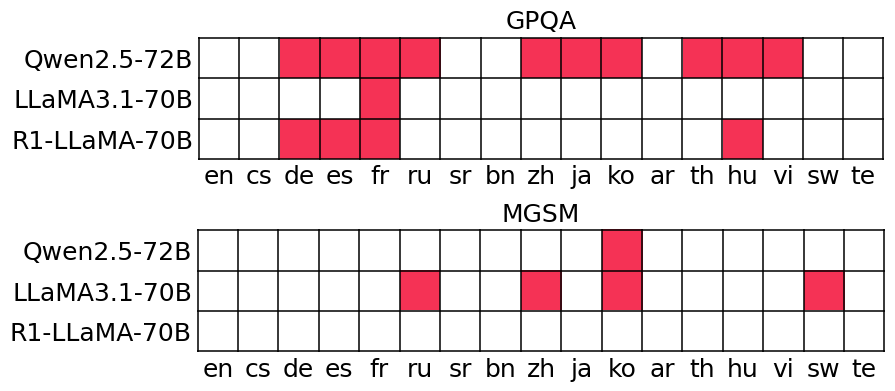

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

# Create a custom color map for red and white
cmap = ListedColormap(['white', '#F53255'])
models = [
    "Qwen2.5-72B", "LLaMA3.1-70B", "R1-LLaMA-70B"
]
languages = [
    "en", "cs", "de", "es", "fr", "ru", "sr", "bn", "zh", "ja", "ko", "ar", "th", "hu", "vi", "sw", "te"
]


# Data conversion: Representing the data as a list of lists
data_gpqa = [
    # [0.2701, 0.2054, 0.2812, 0.2478, 0.2991, 0.2612, 0.2433, 0.2054, 0.2344, 0.2567, 0.1964, 0.221, 0.2701, 0.2321, 0.2656, 0.2143, 0.1496],  # Llama3.1 8B
    # [0.3036, 0.2902, 0.2746, 0.3058, 0.2946, 0.2701, 0.2812, 0.2455, 0.2768, 0.3058, 0.2835, 0.2746, 0.3281, 0.2522, 0.308, 0.1875, 0.2076],  # Qwen2.5 7B
    # [0.2589, 0.2567, 0.2567, 0.2679, 0.2545, 0.3103, 0.2612, 0.2388, 0.2768, 0.2567, 0.3013, 0.2679, 0.2589, 0.2612, 0.3058, 0.2121, 0.2009],  # Aya-Expanse 8B
    # [0.2835, 0.2589, 0.3036, 0.3125, 0.2946, 0.3058, 0.25, 0.2522, 0.3036, 0.3103, 0.2946, 0.2924, 0.2433, 0.2723, 0.2946, 0.2165, 0.2188],  # Aya-Expanse 32B
    [0.3973, 0.3951, 0.4375, 0.4152, 0.4241, 0.4241, 0.3973, 0.3326, 0.4129, 0.4353, 0.4353, 0.3683, 0.4085, 0.4464, 0.4107, 0.2969, 0.2612],  # Qwen2.5 72B
    [0.4174, 0.3772, 0.4062, 0.3996, 0.4353, 0.3929, 0.3103, 0.2991, 0.3862, 0.3237, 0.3549, 0.3661, 0.3304, 0.3817, 0.3906, 0.2879, 0.2344],  # Llama3.1 70B
    [0.5625, 0.5580, 0.5647, 0.5714, 0.5714, 0.5089, 0.4710, 0.2768, 0.3929, 0.4196, 0.5313, 0.4911, 0.4933, 0.5670, 0.5625, 0.5201, 0.2723], # R1-Llama
    # [0.3817, 0.3036, 0.3839, 0.3728, 0.3638, 0.3549, 0.3772, 0.3147, 0.3728, 0.3438, 0.3527, 0.317, 0.3147, 0.2969, 0.3281, 0.3036, 0.308],  # gpt-4o-mini
]
# Convert data into a DataFrame for easier manipulation and visualization
df_gpqa = pd.DataFrame(data_gpqa, columns=languages, index=models)
df_gpqa = df_gpqa * 100

# Define the color map: if value > English performance, red; otherwise, white
# Create a binary matrix where 1 represents red and 0 represents white
binary_matrix = np.where(df_gpqa.values > df_gpqa["en"].values[:, None], 1, 0)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
ax1 = axes[0]
ax1.imshow(binary_matrix, cmap=cmap, aspect="equal", interpolation="nearest")

# for i in range(len(models)):
#     for j in range(len(languages)):
#         ax1.text(j, i, f"{df_gpqa.iloc[i, j]:.1f}", ha='center', va='center', color="white" if binary_matrix[i][j] else "black", fontsize=12)

ax1.set_xticks(np.arange(-0.5, len(languages), 1), minor=True)
ax1.set_yticks(np.arange(-0.5, len(models), 1), minor=True)
ax1.grid(which='minor', color='black', linestyle='-', linewidth=1.1)
ax1.tick_params(axis='both', which='both', length=0)
ax1.set_xticks(np.arange(len(languages)))
ax1.set_yticks(np.arange(len(models)))
ax1.set_xticklabels(languages, fontsize=18)
ax1.set_yticklabels(models, fontsize=18)
ax1.set_xlim(-0.52, len(languages) - 0.48)
ax1.set_ylim(len(models) - 0.48, -0.53)
ax1.set_title("GPQA", fontsize=18)


# Data conversion: Representing the data as a list of lists
data_mgsm = [
    # [0.772, 0.624, 0.668, 0.728, 0.66, 0.7, 0.636, 0.512, 0.696, 0.616, 0.704, 0.628, 0.704, 0.528, 0.688, 0.58, 0.34],  # Llama3.1 8B
    # [0.812, 0.64, 0.692, 0.732, 0.632, 0.656, 0.632, 0.6, 0.768, 0.7, 0.768, 0.7, 0.7, 0.596, 0.732, 0.14, 0.272],  # Qwen2.5 7B
    # [0.796, 0.648, 0.624, 0.672, 0.612, 0.632, 0.424, 0.24, 0.688, 0.644, 0.7, 0.656, 0.184, 0.332, 0.66, 0.068, 0.06],  # Aya-Expanse 8B
    # [0.88, 0.748, 0.74, 0.792, 0.68, 0.752, 0.668, 0.564, 0.784, 0.784, 0.796, 0.76, 0.536, 0.608, 0.784, 0.252, 0.204],  # Aya-Expanse 32B
    [0.852, 0.8, 0.792, 0.816, 0.752, 0.764, 0.82, 0.832, 0.82, 0.824, 0.884, 0.832, 0.744, 0.804, 0.816, 0.576, 0.504],  # Qwen2.5 72B
    [0.828, 0.796, 0.82, 0.812, 0.688, 0.832, 0.82, 0.736, 0.844, 0.816, 0.876, 0.816, 0.824, 0.808, 0.82, 0.856, 0.552],  # Llama3.1 70B
    [0.936, 0.872, 0.864, 0.872, 0.84, 0.896, 0.924, 0.752, 0.88, 0.816, 0.896, 0.908, 0.896, 0.852, 0.876, 0.828, 0.78], # R1-Llama
    # [0.82, 0.78, 0.744, 0.788, 0.692, 0.744, 0.796, 0.732, 0.812, 0.78, 0.848, 0.828, 0.764, 0.768, 0.78, 0.692, 0.704],  # gpt-4o-mini
]

# Convert data into a DataFrame for easier manipulation and visualization
df_mgsm = pd.DataFrame(data_mgsm, columns=languages, index=models)
df_mgsm = df_mgsm * 100

# Define the color map: if value > English performance, red; otherwise, white
# Create a binary matrix where 1 represents red and 0 represents white
binary_matrix_mgsm = np.where(df_mgsm.values > df_mgsm["en"].values[:, None], 1, 0)

# Plotting
ax2 = axes[1]
ax2.imshow(binary_matrix_mgsm, cmap=cmap, aspect="equal", interpolation="nearest")

# for i in range(len(models)):
#     for j in range(len(languages)):
#         ax2.text(j, i, f"{df_mgsm.iloc[i, j]:.1f}", ha='center', va='center', color="white" if binary_matrix_mgsm[i][j] else "black", fontsize=12)

ax2.set_xticks(np.arange(-0.5, len(languages), 1), minor=True)
ax2.set_yticks(np.arange(-0.5, len(models), 1), minor=True)
ax2.grid(which='minor', color='black', linestyle='-', linewidth=1.1)
ax2.tick_params(axis='both', which='both', length=0)
ax2.set_xticks(np.arange(len(languages)))
ax2.set_yticks(np.arange(len(models)))
ax2.set_xticklabels(languages, fontsize=18)
ax2.set_yticklabels(models, fontsize=18)
ax2.set_xlim(-0.52, len(languages) - 0.48)
ax2.set_ylim(len(models) - 0.48, -0.52)
ax2.set_title("MGSM", fontsize=18)
# Remove the borders of the plots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
# Show the plot
plt.tight_layout()
plt.savefig("fig/imshow_gpqa_mgsm.pdf", bbox_inches='tight')
plt.show()

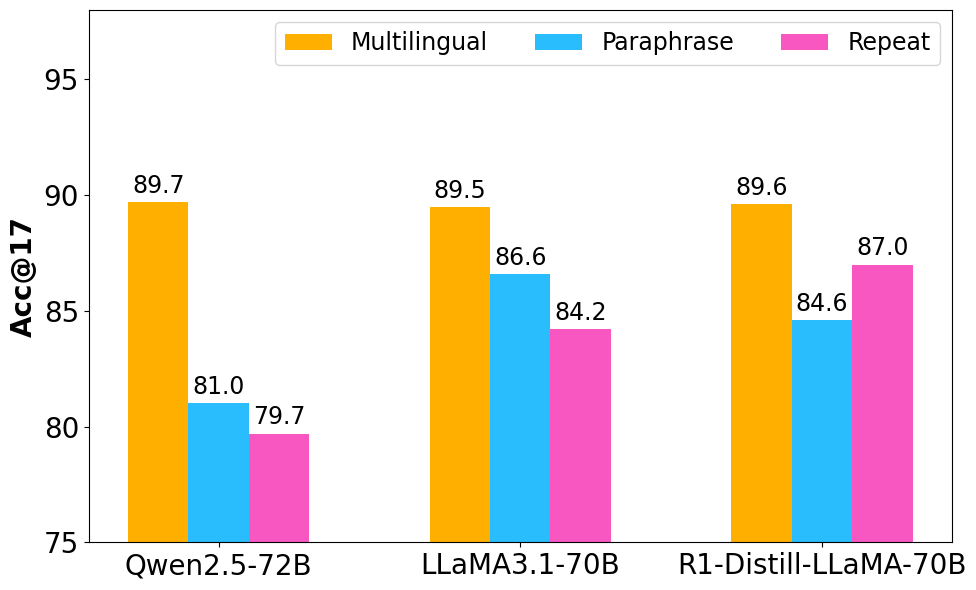

In [2]:
# colors = ["#A9DEF9", "#EDE7B1", "#F694C1", "#E4C1F9", "#D3F8E2",]
colors = ["#FFAF00", "#29BDFD", "#F857C1", "#00CBBF", "#F53255"]
labels = ["Qwen2.5-72B", "LLaMA3.1-70B", "R1-Distill-LLaMA-70B"]
# multilingual_values = [88.8, 93.3, 90.8]  # human translated
multilingual_values = [89.7, 89.5, 89.6]  # machine translated
repeat_values = [79.7, 84.2, 87.0]
paraphrase_values = [81.0, 86.6, 84.6]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of bars with an offset
bars1 = ax.bar(x - width, multilingual_values, width, label='Multilingual', color=colors[0])
bars2 = ax.bar(x, paraphrase_values, width, label='Paraphrase', color=colors[1])
bars3 = ax.bar(x + width, repeat_values, width, label='Repeat', color=colors[2])

# Show values above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=17)

# Add labels, title, and legend
ax.set_ylabel("Acc@17", fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.set_ylim(75, 98)
ax.legend(fontsize=17, ncols=3)

# Display the plot
fig.tight_layout()
plt.savefig("fig/huge_gain.pdf", bbox_inches='tight')
plt.show()

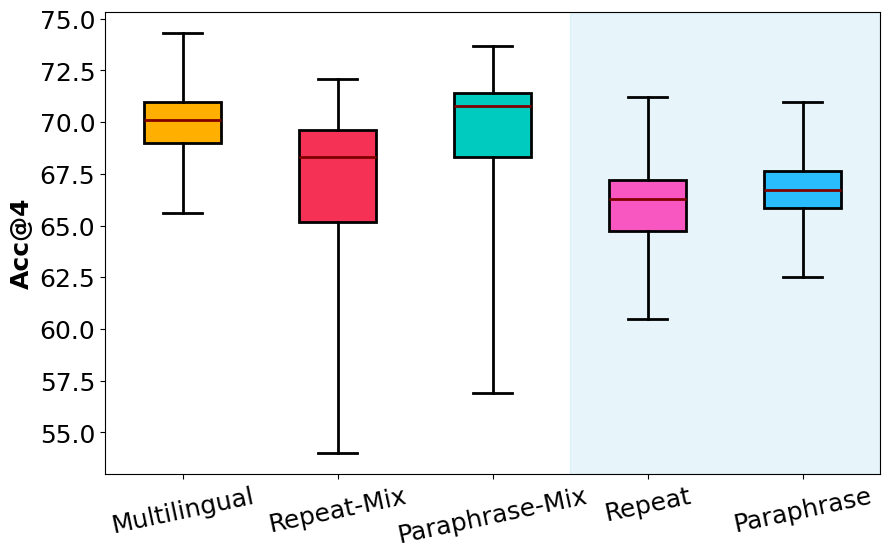

In [3]:
import seaborn as sns

multilingual = np.load("outputs/xgpqa/qwen/multilingual_pass4.npy") * 100
mix_paraphrase = np.load("outputs/xgpqa/qwen/mix_paraphrase_pass2+2.npy") * 100
mix_repeat = np.load("outputs/xgpqa/qwen/mix_repeat_pass2+2.npy") * 100
paraphrase = np.load("outputs/xgpqa/qwen/paraphrase_pass4.npy") * 100
repeat = np.load("outputs/xgpqa/qwen/repeat_pass4.npy") * 100

fig, ax = plt.subplots(figsize=(10, 6))
bplot = ax.boxplot(
    [multilingual, mix_repeat, mix_paraphrase, repeat, paraphrase],
    tick_labels=["Multilingual", "Repeat-Mix", "Paraphrase-Mix",  "Repeat", "Paraphrase"],
    whis=[0, 100],
    patch_artist=True,
    boxprops=dict(color="black", linewidth=2),
    capprops=dict(color="black", linewidth=2),
    whiskerprops=dict(color="black", linewidth=2),
    medianprops=dict(color="maroon", linewidth=2),
)
for patch, color in zip(bplot['boxes'], colors[0:1]+colors[4:0:-1]):
    patch.set_facecolor(color)

ax.set_ylabel("Acc@4", fontsize=18, fontweight='bold')
ax.tick_params(axis='x', labelsize=18, rotation=12)
ax.tick_params(axis='y', labelsize=18)
ax.axvspan(3.5, 5.5, color='skyblue', alpha=0.2)
# sns.violinplot(
#     data=[multilingual, mix_paraphrase, mix_repeat, paraphrase, repeat],
#     ax=ax, inner=None)

# fig.tight_layout()
plt.savefig("fig/multilingual_gain.pdf", bbox_inches='tight')
plt.show()

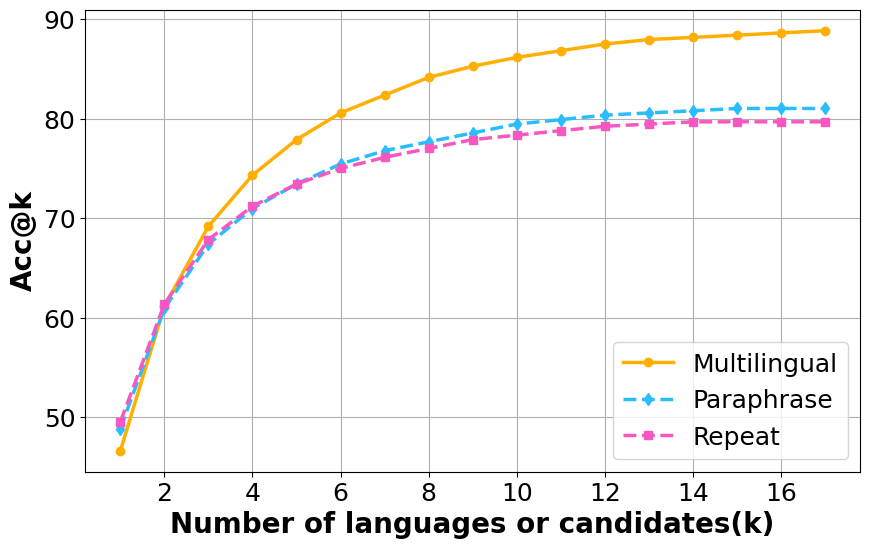

In [4]:
# human translated
qwen_multi_best = [46.65, 61.16, 69.20, 74.33, 77.90, 80.58, 82.37, 84.15, 85.27, 86.16, 86.83, 87.50, 87.95, 88.17, 88.39, 88.62, 88.84]
# google translated
# qwen_multi_best = [46.65, 61.38, 69.42, 75.00, 79.02, 81.92, 84.15, 85.27, 86.38, 87.28, 87.95, 88.62, 89.06, 89.29, 89.51, 89.73, 89.73]

qwen_repeat_best = [49.55, 61.38, 67.86, 71.21, 73.44, 75.00, 76.12, 77.01, 77.90, 78.35, 78.80, 79.24, 79.46, 79.69, 79.69, 79.69, 79.69]
qwen_para_best = [48.88, 60.94, 67.41, 70.98, 73.44, 75.45, 76.79, 77.68, 78.57, 79.46, 79.91, 80.36, 80.58, 80.80, 81.03, 81.03, 81.03]



k = np.arange(1, 18)
plt.figure(figsize=(10, 6))
plt.plot(k, qwen_multi_best, "-o", color="#FFAF00", label="Multilingual", linewidth=2.5)
plt.plot(k, qwen_para_best, '--d', color="#29BDFD", label="Paraphrase", linewidth=2.5)
plt.plot(k, qwen_repeat_best, '--s', color="#F857C1", label="Repeat", linewidth=2.5)

plt.xlabel("Number of languages or candidates(k)", fontweight='bold', fontsize=20)
plt.ylabel("Acc@k", fontweight='bold', fontsize=20)
# plt.title("Multilingual Reasoning Upperbounds", fontweight='bold', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)

# Show the plot
# plt.savefig("/cpfs01/shared/XNLP_H800/gaochangjiang/workbench/reasoning/code/motivation/fig/xgpqa_n_langs.pdf", dpi=200, bbox_inches='tight')
plt.savefig("fig/xgpqa_n_langs_human.pdf", bbox_inches='tight')
plt.show()


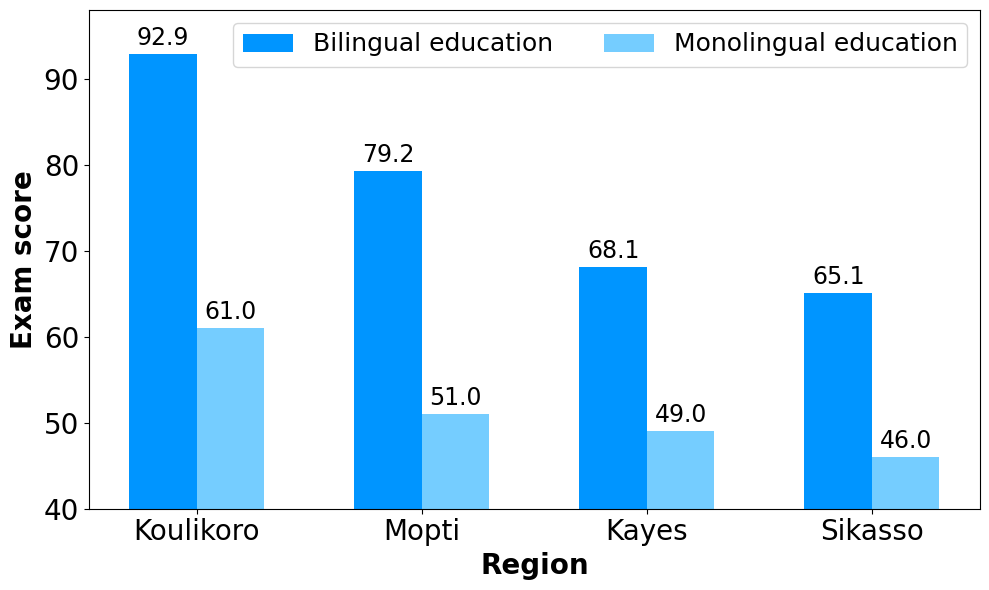

In [5]:
regions = ["Koulikoro", "Mopti", "Kayes", "Sikasso"]
monolingual_values = [61.0, 51.03, 49.04, 46.03]
bilingual_values = [92.9, 79.22, 68.1, 65.1]

x = np.arange(len(regions))
width = 0.3

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of bars with an offset
bars1 = ax.bar(x - width/2, bilingual_values, width, label="Bilingual education", color="#0095FF")
bars2 = ax.bar(x + width/2, monolingual_values, width, label="Monolingual education", color="#75CDFF")

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=17, color="black")

ax.set_xlabel("Region", fontsize=20, fontweight='bold')
ax.set_ylabel("Exam score", fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(regions, fontsize=20)
ax.set_ylim(40, 98)
ax.legend(fontsize=18, ncols=3)

fig.tight_layout()
plt.savefig("fig/mono_vs_bi.pdf", bbox_inches='tight')
plt.show()

In [ ]:
languages = ["En", "De", "Zh", "Th", "Vi"]
qwen_7b = [30.36, 27.46, 27.68, 32.81, 30.8]
qwen_72b = []

x = np.arange(len(regions))
width = 0.3

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of bars with an offset
bars1 = ax.bar(x - width/2, bilingual_values, width, label="Bilingual education", color="#0095FF")
bars2 = ax.bar(x + width/2, monolingual_values, width, label="Monolingual education", color="#75CDFF")

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha="center", va="bottom", fontsize=17, color="black")

ax.set_xlabel("Region", fontsize=20, fontweight='bold')
ax.set_ylabel("Exam score", fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(regions, fontsize=20)
ax.set_ylim(40, 98)
ax.legend(fontsize=18, ncols=3)

fig.tight_layout()
plt.savefig("fig/mono_vs_bi.pdf", bbox_inches='tight')
plt.show()

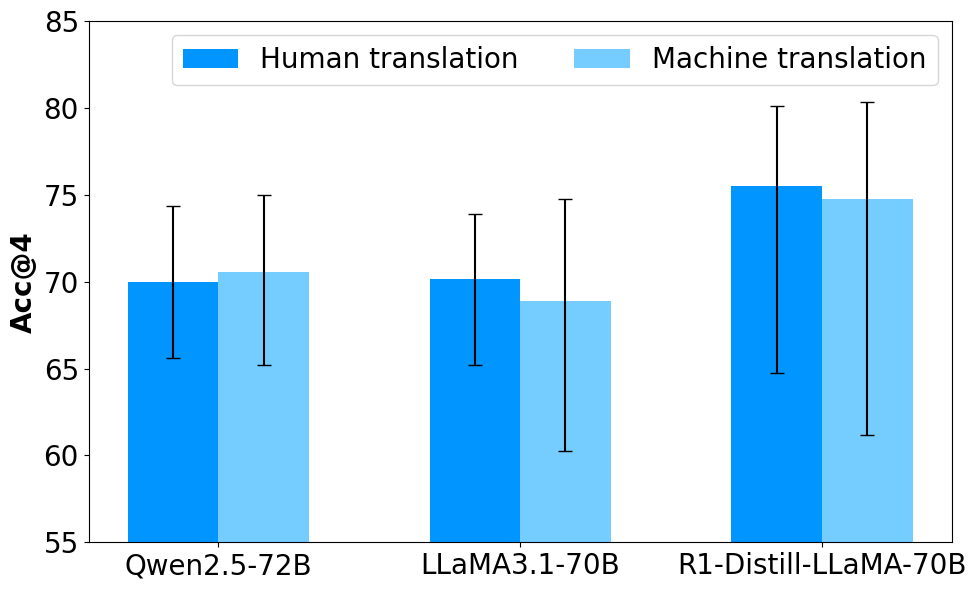

In [6]:
from scipy.stats import sem
import numpy as np
from matplotlib import pyplot as plt

models = ["Qwen2.5-72B", "LLaMA3.1-70B", "R1-Distill-LLaMA-70B"]

qwen_human = np.load("outputs/xgpqa/qwen/multilingual_pass4.npy") * 100
qwen_machine = np.load("outputs/gt-xgpqa/qwen/multilingual_pass4.npy") * 100

llama_human = np.load("outputs/xgpqa/llama/multilingual_pass4.npy") * 100
llama_machine = np.load("outputs/gt-xgpqa/llama/multilingual_pass4.npy") * 100

r1_llama_human = np.load("outputs/xgpqa/r1-llama/multilingual_pass4.npy") * 100
r1_llama_machine = np.load("outputs/gt-xgpqa/r1-llama/multilingual_pass4.npy") * 100

human_means = np.array([np.mean(qwen_human), np.mean(llama_human), np.mean(r1_llama_human)])
human_maxs = np.array([np.max(qwen_human), np.max(llama_human), np.max(r1_llama_human)])
human_mins = np.array([np.min(qwen_human), np.min(llama_human), np.min(r1_llama_human)])
# human_errors = [np.std(qwen_human), np.std(llama_human), np.std(r1_llama_human)]

machine_means = np.array([np.mean(qwen_machine), np.mean(llama_machine), np.mean(r1_llama_machine)])
machine_maxs = np.array([np.max(qwen_machine), np.max(llama_machine), np.max(r1_llama_machine)])
machine_mins = np.array([np.min(qwen_machine), np.min(llama_machine), np.min(r1_llama_machine)])
# machine_errors = [np.std(qwen_machine), np.std(llama_machine), np.std(r1_llama_machine)]

# human_means = [74.33, 73.88, 80.13]
# machine_means = [75.0, 74.78, 80.36]

x = np.arange(len(models))
width = 0.3

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of bars with an offset
bars1 = ax.bar(x - width/2, human_means, width, label='Human translation', color="#0095FF", yerr=[human_means-human_mins, human_maxs-human_means], capsize=5)
bars2 = ax.bar(x + width/2, machine_means, width, label='Machine translation', color="#75CDFF", yerr=[machine_means-machine_mins, machine_maxs-machine_means], capsize=5)

# for bars in [bars1, bars2]:
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.1f}',
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=17, color="black")

# ax.set_xlabel("Region", fontsize=20, fontweight='bold')
ax.set_ylabel("Acc@4", fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=20)
ax.set_ylim(55, 85)
ax.legend(fontsize=20, ncols=3)

fig.tight_layout()
plt.savefig("fig/human_vs_google.pdf", bbox_inches='tight')
plt.show()

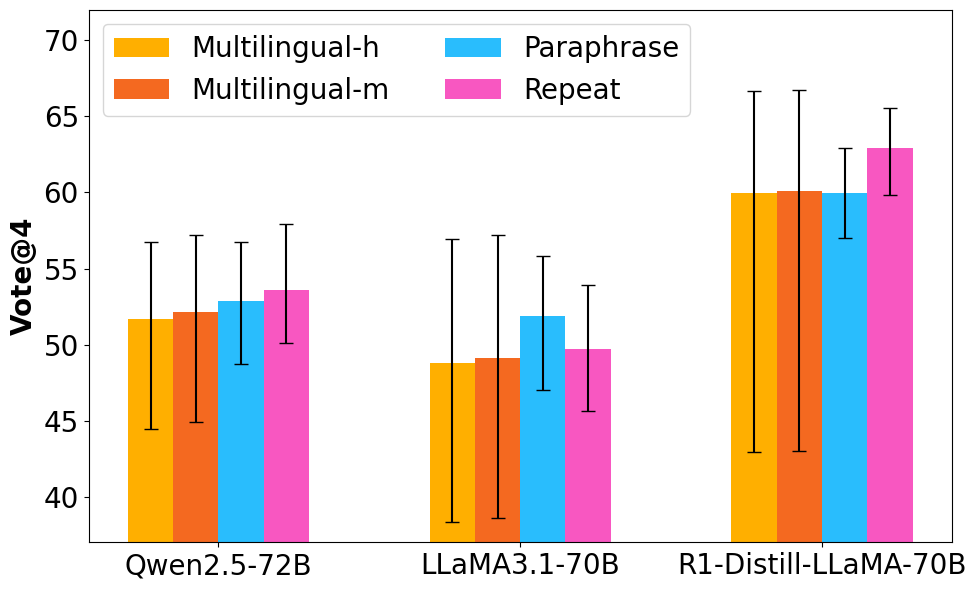

In [7]:
models = ["Qwen2.5-72B", "LLaMA3.1-70B", "R1-Distill-LLaMA-70B"]

best_multilingual_h = np.array([56.977, 55.116, 66.512])
worst_multilingual_h = np.array([43.488, 39.767, 42.558])
random_multilingual_h = np.array([51.711, 48.812, 59.998])

best_multilingual_m = np.array([57.209, 57.209, 66.744])
worst_multilingual_m = np.array([44.884, 38.605, 43.023])
random_multilingual_m = np.array([52.153, 49.090, 60.093])

best_repeat = np.array([57.957, 53.919, 65.558])
worst_repeat = np.array([50.119, 45.606, 59.857])
random_repeat = np.array([53.563, 49.711, 62.893])

best_para = np.array([56.770, 55.819, 62.945])
worst_para = np.array([48.694, 47.031, 57.007])
random_para = np.array([52.880, 51.866, 59.964])

x = np.arange(len(models))
width = 0.15

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each set of bars with an offset
bars1 = ax.bar(x - 1.5*width, random_multilingual_h, width, label="Multilingual-h", color=colors[0], yerr=[random_multilingual_m - worst_multilingual_m, best_multilingual_m - random_multilingual_m], capsize=5)
bars2 = ax.bar(x - 0.5*width, random_multilingual_m, width, label="Multilingual-m", color="#F46920", yerr=[random_multilingual_m - worst_multilingual_m, best_multilingual_m - random_multilingual_m], capsize=5)
bars3 = ax.bar(x + 0.5*width, random_para, width, label="Paraphrase", color=colors[1], yerr=[random_para - worst_para, best_para - random_para], capsize=5)
bars4 = ax.bar(x + 1.5*width, random_repeat, width, label="Repeat", color=colors[2], yerr=[random_repeat - worst_repeat, best_repeat - random_repeat], capsize=5)

ax.set_ylabel("Vote@4", fontsize=20, fontweight='bold')
ax.tick_params(axis='y', labelsize=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=20)
ax.set_ylim(37, 72)
ax.legend(fontsize=20, ncols=2)

fig.tight_layout()
plt.savefig("fig/majority_voting.pdf", bbox_inches='tight')
plt.show()

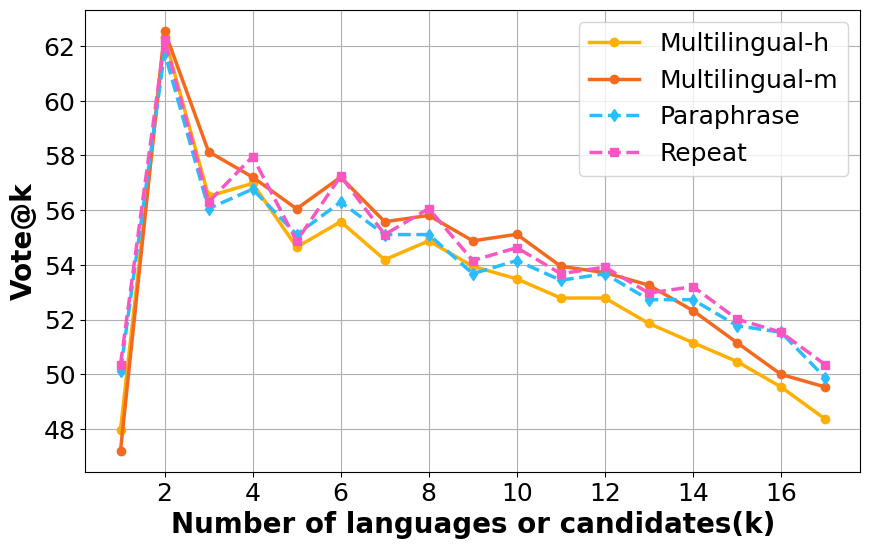

In [8]:
# colors = ["#FFAF00", "#29BDFD", "#F857C1", "#00CBBF", "#F53255"]
qwen_multi_h_best = [47.98, 62.33, 56.51, 56.98, 54.65, 55.58, 54.19, 54.88, 53.95, 53.49, 52.79, 52.79, 51.86, 51.16, 50.47, 49.54, 48.37]
qwen_multi_m_best = [47.21, 62.56, 58.14, 57.21, 56.05, 57.21, 55.58, 55.81, 54.88, 55.12, 53.95, 53.72, 53.26, 52.33, 51.16, 50.00, 49.54]
qwen_para_best = [50.12, 61.76, 56.06, 56.77, 55.11, 56.30, 55.11, 55.11, 53.68, 54.16, 53.44, 53.68, 52.73, 52.73, 51.78, 51.54, 49.88]
qwen_repeat_best = [50.36, 62.23, 56.30, 57.96, 54.87, 57.25, 55.11, 56.06, 54.16, 54.63, 53.68, 53.92, 52.97, 53.21, 52.02, 51.54, 50.36]
k = np.arange(1, 18)
plt.figure(figsize=(10, 6))
plt.plot(k, qwen_multi_h_best, "-o", color="#FFAF00", label="Multilingual-h", linewidth=2.5)
plt.plot(k, qwen_multi_m_best, "-o", color="#F46920", label="Multilingual-m", linewidth=2.5)
plt.plot(k, qwen_para_best, '--d', color="#29BDFD", label="Paraphrase", linewidth=2.5)
plt.plot(k, qwen_repeat_best, '--s', color="#F857C1", label="Repeat", linewidth=2.5)

plt.xlabel("Number of languages or candidates(k)", fontweight='bold', fontsize=20)
plt.ylabel("Vote@k", fontweight='bold', fontsize=20)
# plt.title("Multilingual Reasoning Upperbounds", fontweight='bold', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
plt.grid(True)

# Show the plot
# plt.savefig("/cpfs01/shared/XNLP_H800/gaochangjiang/workbench/reasoning/code/motivation/fig/xgpqa_n_langs.pdf", dpi=200, bbox_inches='tight')
plt.savefig("fig/xgpqa_n_langs_vote.pdf", bbox_inches='tight')
plt.show()